In [6]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [4]:
dataset_split = pd.read_csv("housing_clean.csv")


In [5]:
dataset_split.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms           float64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

#Regresi(DNN)

In [8]:
df = sns.load_dataset('anscombe')

Split data

In [22]:
from sklearn.model_selection import train_test_split

x=df['x']
y=df['y']

x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size=0.15,
    random_state=45)

    #split data train =>train + val
x_val = x_train.iloc[:30]
y_val = y_train.iloc[:30]


Buat Arsitektur DNN

In [17]:
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential([
    Dense (units=5, activation='linear', input_shape=(None,1))
])

model training

model compile

In [19]:
model.compile(
optimizer = 'adam',
loss= 'mean_squared_error'
)

model fit

In [23]:
model.fit(
    x=x_train,y=y_train,
    epochs=100,
    validation_data = (x_val,y_val)
)

Epoch 1/100
2/2 [==============================] - 1s 278ms/step - loss: 74.4481 - val_loss: 76.4342
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 74.1564 - val_loss: 76.1277
Epoch 3/100
2/2 [==============================] - 0s 142ms/step - loss: 73.8616 - val_loss: 75.8284
Epoch 4/100
2/2 [==============================] - 0s 82ms/step - loss: 73.5573 - val_loss: 75.5294
Epoch 5/100
2/2 [==============================] - 0s 70ms/step - loss: 73.2687 - val_loss: 75.2258
Epoch 6/100
2/2 [==============================] - 0s 67ms/step - loss: 72.9807 - val_loss: 74.9211
Epoch 7/100
2/2 [==============================] - 0s 58ms/step - loss: 72.6884 - val_loss: 74.6191
Epoch 8/100
2/2 [==============================] - 0s 71ms/step - loss: 72.3951 - val_loss: 74.3200
Epoch 9/100
2/2 [==============================] - 0s 68ms/step - loss: 72.0944 - val_loss: 74.0195
Epoch 10/100
2/2 [==============================] - 0s 71ms/step - loss: 71.8151 - val_loss: 73.71

model Evalute

In [24]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 42ms/step - loss: 41.6167


41.61665725708008

model prediksi

In [25]:
hasil_prediksi = model.predict(x_test)

1/1 [==============================] - 0s 244ms/step


In [26]:
hasil_prediksi

array([[[ 4.03416   ,  5.753282  , -0.04624729, -1.5739955 ,
         -0.31750458]],

       [[ 2.1081624 ,  2.9596305 ,  0.07247078, -0.69073415,
         -0.06302054]],

       [[ 4.997159  ,  7.150108  , -0.10560633, -2.015626  ,
         -0.4447466 ]],

       [[ 6.9231563 ,  9.94376   , -0.22432439, -2.8988874 ,
         -0.6992307 ]],

       [[ 5.478658  ,  7.8485208 , -0.13528584, -2.2364414 ,
         -0.5083676 ]],

       [[ 4.5156593 ,  6.451695  , -0.0759268 , -1.7948108 ,
         -0.38112563]],

       [[ 4.03416   ,  5.753282  , -0.04624729, -1.5739955 ,
         -0.31750458]]], dtype=float32)

klasifikasi DNN

In [28]:
from tensorflow.keras import datasets

In [30]:
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [31]:
import matplotlib.pyplot as plt


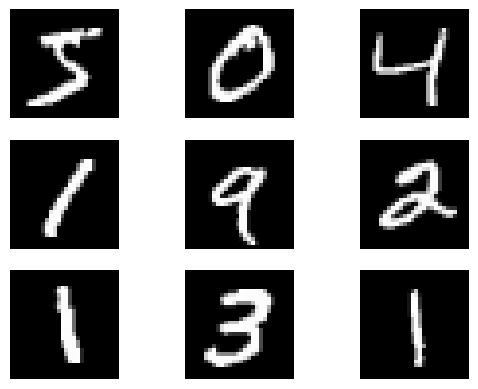

In [35]:
plt.figure()
for i in range(9):
    plt.subplot(3, 3 ,i+1)
    plt.imshow(x_train [i], cmap='gray')
    plt.axis('off')
plt.show()


transformasi gambar

In [37]:
x_test.shape

(10000, 784)

In [38]:
# ubah data dari 28x28 ke 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#normalisasi pixel gambar (khusus gambar hitam putih)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Buat arsitektur model

In [40]:
model = Sequential([
    #input layer
    Dense(16, activation= 'relu', input_shape= [784]),
    #hiden layer
    Dense(32, activation='relu'),
    Dense(64,activation='relu'),
    #ouput layer
    Dense(10, activation= 'softmax'),

])

In [43]:
model.compile (optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics= ['accuracy'])

In [47]:
model.fit(x_train ,y_train, batch_size=128, epochs=10,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6380 - accuracy: 0.8053 - val_loss: 0.2822 - val_accuracy: 0.9172
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2720 - accuracy: 0.9208 - val_loss: 0.2355 - val_accuracy: 0.9314
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2262 - accuracy: 0.9334 - val_loss: 0.2035 - val_accuracy: 0.9404
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2007 - accuracy: 0.9410 - val_loss: 0.1921 - val_accuracy: 0.9427
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1801 - accuracy: 0.9466 - val_loss: 0.1835 - val_accuracy: 0.9470
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1644 - accuracy: 0.9511 - val_loss: 0.1694 - val_accuracy: 0.9486
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1506 - accuracy: 0.9555 - val_loss: 0.1622 - val_accuracy: 0.9519
Epoch 

In [48]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1520 - accuracy: 0.9549


[0.15203246474266052, 0.9549000263214111]

In [49]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [50]:
import numpy as np
y_pred_decoded = np.argmax(y_pred, axis=1)

##ubah hasil prediksi

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred=y_pred_decoded))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.93      0.94      0.93      1010
           4       0.97      0.95      0.96       982
           5       0.93      0.95      0.94       892
           6       0.96      0.97      0.96       958
           7       0.97      0.93      0.95      1028
           8       0.92      0.95      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.96      0.95      0.95     10000



pertemuan7

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Normalisasi pixel pada gambar

In [5]:
x_train = x_train / 255.0
x_train = x_test / 255.0

In [6]:
x_train.shape

(10000, 28, 28)

tambah dimensi pada gambar

In [7]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [8]:
y_train[0]

9

9


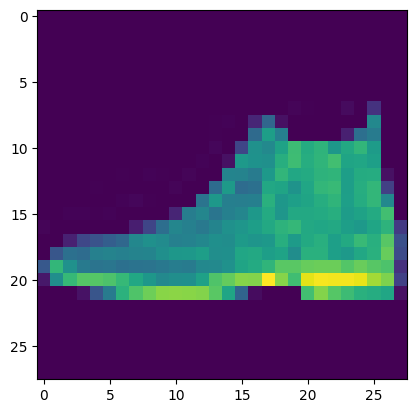

In [9]:
plt.imshow(x_train[0][:, :, 0])
print(y_train[0])

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout

In [16]:
model = tf.keras.Sequential([
    Conv2D(32, (5,5), padding='same', activation= 'relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(64, (5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Dropout(0,25),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])
model.compile("Adam", "sparse_categorical_crossentropy", ['accuracy'])

In [17]:
hasil = model.fit(
    x_train, y_train, batch_size=128,
    epochs=20, validation_split=0.1
)

Epoch 1/20
71/71 [==============================] - 15s 197ms/step - loss: 2.3039 - accuracy: 0.1018 - val_loss: 2.3040 - val_accuracy: 0.0850
Epoch 2/20
71/71 [==============================] - 14s 193ms/step - loss: 2.3022 - accuracy: 0.1104 - val_loss: 2.3065 - val_accuracy: 0.0900
Epoch 3/20
71/71 [==============================] - 13s 189ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3053 - val_accuracy: 0.0930
Epoch 4/20
71/71 [==============================] - 17s 237ms/step - loss: 2.3013 - accuracy: 0.1072 - val_loss: 2.3071 - val_accuracy: 0.0790
Epoch 5/20
71/71 [==============================] - 14s 193ms/step - loss: 2.2993 - accuracy: 0.1178 - val_loss: 2.3097 - val_accuracy: 0.0920
Epoch 6/20
71/71 [==============================] - 13s 187ms/step - loss: 2.2964 - accuracy: 0.1209 - val_loss: 2.3118 - val_accuracy: 0.1030
Epoch 7/20
71/71 [==============================] - 13s 188ms/step - loss: 2.2926 - accuracy: 0.1296 - val_loss: 2.3069 - val_accuracy: 0.0930

In [ ]:
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('Akurasi')
plt.legend([legend'Training Accuracy', 'validation Accuracy' ])